# Resolution

> A __valuation__ makes some atoms true and the rest false.

The __resolution rule__ is as follows:
$$
\dfrac{a_1 \lor ... \lor a_n \quad b_1 \lor ... \lor b_m}{a_1 \lor ... \lor a_n \lor b_1 \lor ... \lor b_m}
$$

For example consider the following axioms:
$$
¬A \lor C,\quad ¬B \lor D,\quad ¬E \lor B,\quad ¬E \lor A,\quad A \lor E,\quad E \lor B
$$

We can apply the rule like so:
$$
\dfrac
{
\dfrac{¬B \lor D \quad ¬E \lor B}{D \lor ¬E}
\quad
\dfrac{E \lor B \quad ¬B \lor D}{E \lor D}
}
{D}
$$

which is equivilent to the implies form:
$$
\dfrac
{
\dfrac{¬D \rightarrow ¬B \quad ¬B \rightarrow ¬E}{¬D \rightarrow ¬E}
\quad
\dfrac{¬E \rightarrow B \quad B \rightarrow D}{¬E \rightarrow D}
}
{D}
$$

This allows use to determine if a propositional formular is satisfiable.

### Clausal form
Resolution uses CNF however however that can get quite long, so clausal form expresses the same state statement with sets.

Here are some clauses are written in CNF:
$$
(¬A \lor C) \land (¬B \lor D) \land (¬E \lor B) \land (¬E \lor A) \land (A \lor E) \land (E \lor B) \land (¬B \lor ¬C \lor ¬D)
$$

And here they are in clausal form:
$$
\big\{ \{¬A, C\}, \{¬B, D\}, \{¬E, B\}, \{¬E, A\}, \{A, E\}, \{E, B\}, \{¬B, ¬C, ¬D\} \big\}
$$

Each set represents the disjunction of its literals, with an empty disjunction representing $\bot$ (when we _or_ some things we have to satisfy atleast one of them, if their arent any we cant satisfy nothing therefore an empty disjunction is $\bot$). If the outer set is empty it represents $\top$ (when we _and_ some things we have to satisfy them all, if their arent any their is nothing to satisfy, thus an empty conjunction is $\top$).

The resolution rule becomes:
$$
\dfrac{X \quad Y}{(x \cup Y) \setminus \{¬A, A\}} \quad \text{where} \, ¬A \in X, A \in Y
$$
If we have two clauses $X$ and $Y$, the conclusion becomes the union of those clauses minus the literal we are cancelling.

### David Putnam
This algorithun is used to decide the satisfiability of propositional logic formula by using resolution to try and reduce the set of sets to the empty set.

- Take a collection of clauses $C$
- For each propositional letter, $A$
    - For each pair $(X, Y) | X \in C \land Y \in C \land A \in X \land ¬A \in Y$
        - if $R(X, Y, A) = \{\}$ return __unsatisfactory__
        - if $R(X, Y, A)$ is contingent $C := C \cup \{R(X, Y)\}$
    - remove any clauses containing $A$ or $¬A$
- return __satisfactory__



Where $R(X, Y, A) = X \cup Y \setminus \{A, ¬A\}$.

A set is contingent if it does not contain any complementry pairs of literals

Consider the following axioms
$$
¬A \lor C,\quad ¬B \lor D,\quad ¬E \lor B,\quad ¬E \lor A,\quad A \lor E,\quad E \lor B,\quad ¬C \lor ¬D
$$

Running David Putnam shows us that this is unsatisfiable

|     | $A$ | $B$ | $C$ | $D$ | $E$ |
| :--- | :--- | :--- | :--- | :--- | :--- |
| <div style="width:60px;">$\{¬A, C\}$</div> | <div style="width:60px;">$\{¬E, C\}$</div> | <div style="width:60px;">$\{¬E, D\}$</div> | <div style="width:60px;">$\{¬E, D\}$</div> | <div style="width:60px;">$\{E\}$</div> | <div style="width:60px;">$\{\}$</div> |
| $\{¬B, D\}$ | $\{C, E\}$ | $\{E, D\}$ | $\{¬D, E\}$ | $\{¬E\}$ |
| $\{¬E, B\}$ | | | | | |
| $\{¬E, A\}$ | | | | | |
| $\{A, E\}$ | | | | | | 
| $\{E, B\}$ | | | | | |
| $\{¬C, ¬D\}$ | | | | | | | 

- We look at all the sets containing A and carry out resolution.
- Then we look at all the sets containing B (including the new sets).
- When we look at E their is actually 4 possiblitys, however 2 of them are $\{E, ¬E\}$ so they are discarded.
- Finnaly we get the empty set, therefore the axioms are unsitisfiable.

### Refuatation
The problem with resolution is that it requires alot of memory, since it must remember all the sets. Another approach is refutation, which is to do a search across all permutations of literals. If you cannot find a set of literals that satisfy the axioms then the problem is unsatisfiable. The benifit to this approach is that you only have to rememeber the branch your on (if you do a tree search).

Consider the following set of disjunctions:
$$
\{Z, Y\} \quad \{¬Y\} \quad \{Q, ¬Z, X\} \quad \{¬Q, X\} \quad \{¬Z, ¬X\}
$$

This produces the following tree:
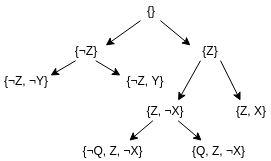


- if all axioms are satisfied then the set is a solution.
- if none of the axioms are satisfied then the set is not a solution.
- if the set does not have all propositional letters, then a branch adds the next letter and its negation.
- if all of the sets do not satisfy the axioms then the problem is unsatisfiable.